In [37]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [39]:
#Question 1
#import data
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import yesg

In [7]:
# Download DAL stock data from Yahoo Finance
dal_data = yf.download('DAL', start='2015-01-01', end='2019-12-31', interval='1d')

# We only need the 'Adj Close' column for calculating logarithmic returns
dal_adj_close = dal_data['Adj Close']

# Resample the data to get monthly prices (using the last day of each month)
monthly_prices = dal_adj_close.resample('M').last()

# Calculate the monthly log returns
monthly_log_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()

# Output the result
print(monthly_log_returns)

[*********************100%%**********************]  1 of 1 completed
Date
2015-02-28   -0.058770
2015-03-31    0.009835
2015-04-30   -0.007143
2015-05-31   -0.037240
2015-06-30   -0.043817
2015-07-31    0.076366
2015-08-31   -0.009793
2015-09-30    0.024593
2015-10-31    0.124914
2015-11-30   -0.087441
2015-12-31    0.087137
2016-01-31   -0.134970
2016-02-29    0.088596
2016-03-31    0.009080
2016-04-30   -0.155487
2016-05-31    0.045276
2016-06-30   -0.176448
2016-07-31    0.061738
2016-08-31   -0.047513
2016-09-30    0.068612
2016-10-31    0.059428
2016-11-30    0.147368
2016-12-31    0.020746
2017-01-31   -0.040449
2017-02-28    0.059353
2017-03-31   -0.082850
2017-04-30   -0.011379
2017-05-31    0.082186
2017-06-30    0.089688
2017-07-31   -0.085017
2017-08-31   -0.038521
2017-09-30    0.021592
2017-10-31    0.036849
2017-11-30    0.062361
2017-12-31    0.056570
2018-01-31    0.013656
2018-02-28   -0.046124
2018-03-31    0.016742
2018-04-30   -0.048407
2018-05-31    0.040370
2018-0

In [14]:
#calculatin annualized return
annualized_return = monthly_log_returns.sum() * 12

In [18]:
# Output the result
print(f'Annualized Return: {annualized_return *100:.2f}%')

Annualized Return: 376.07%


In [15]:
# Calculate the standard deviation of the monthly log returns
monthly_volatility = monthly_log_returns.std()

# Annualize the volatility
annualized_volatility = monthly_volatility * np.sqrt(12)

In [17]:
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 26.63%


In [95]:
#Downloading the ESG data
esg_data = yesg.get_historic_esg('DAL')
esg_df = pd.DataFrame(esg_data)
total_scores = esg_df['Total-Score']

#Selecting range of date
selected_range = total_scores.loc['2015-01-01':'2019-12-31']


#Filling the missing values
selected_range_filled = selected_range.fillna(method='ffill')
print(selected_range)

Date
2015-01-01    65.00
2015-02-01    65.00
2015-03-01    65.00
2015-04-01    65.00
2015-05-01    65.00
2015-06-01    65.00
2015-07-01    65.00
2015-08-01    65.00
2015-09-01    65.00
2015-10-01    64.00
2015-11-01    64.00
2015-12-01    65.00
2016-01-01    64.85
2016-02-01    64.85
2016-03-01    64.85
2016-04-01    63.79
2016-05-01    63.79
2016-06-01    63.79
2016-07-01    63.24
2016-08-01    63.24
2016-09-01    63.24
2016-10-01    63.24
2016-11-01    63.24
2016-12-01    63.24
2017-01-01    59.51
2017-02-01    59.51
2017-03-01    60.27
2017-04-01    60.27
2017-05-01    61.35
2017-06-01    61.35
2017-07-01    61.35
2017-08-01    61.35
2017-09-01    61.35
2017-10-01    60.75
2017-11-01    60.75
2017-12-01    60.75
2018-01-01    60.75
2018-02-01    60.75
2018-03-01    60.75
2018-04-01    57.99
2018-05-01    57.99
2018-06-01    57.99
2018-07-01    57.99
2018-08-01    57.99
2018-09-01    57.99
2018-10-01    57.99
2018-11-01    57.66
2018-12-01    57.66
2019-01-01    59.54
2019-02-01    5

Text(0.5, 1.0, 'Total ESG scores for Delta Airlines Inc.')

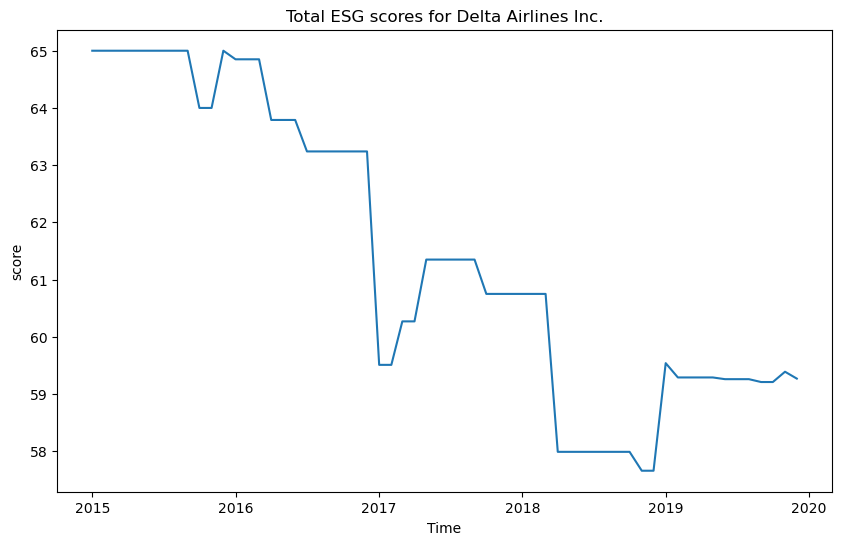

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(selected_range)
plt.xlabel('Time')
plt.ylabel('score')
plt.title('Total ESG scores for Delta Airlines Inc.')

In [99]:
# Compute the correlation coefficient
correlation=(selected_range).corr(dal_data)

ValueError: operands could not be broadcast together with shapes (39,) (39,6) 

In [19]:
#Question 2
#import data
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [20]:
#Setting the time period
start = datetime(2022, 6, 1)
end = datetime(2022, 6, 30)

In [26]:
#Specifying the location
location = Point(23.1291, 113.1245, 72)

In [27]:
#Fetching the data
data = Daily(location, start, end)
data = data.fetch()

In [30]:
#calculating CDD
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]
print(cdds)

[6.600000000000001, 0, 0, 1.0, 2.8000000000000007, 4.300000000000001, 6.800000000000001, 6.399999999999999, 6.399999999999999, 6.399999999999999, 7.5, 8.100000000000001, 9.2, 6.0, 6.699999999999999, 7.300000000000001, 1.0, 0, 0, 0, 2.6999999999999993, 6.899999999999999, 7.300000000000001, 6.5, 8.7, 10.100000000000001, 9.7, 10.7, 10.100000000000001, 8.100000000000001, 5.300000000000001, 0, 0.5, 4.199999999999999, 6.199999999999999, 8.0, 9.3, 5.300000000000001, 4.899999999999999, 7.600000000000001, 6.899999999999999, 6.5, 5.199999999999999, 4.199999999999999, 4.699999999999999, 2.3000000000000007, 1.5, 5.100000000000001, 7.399999999999999, 8.899999999999999, 10.3, 7.300000000000001, 5.600000000000001, 6.199999999999999, 8.899999999999999, 9.0, 10.7, 7.899999999999999, 10.899999999999999, 10.7, 11.7, 9.8, 9.600000000000001, 10.3, 10.399999999999999, 12.2, 12.3, 8.8, 7.399999999999999, 8.5, 7.100000000000001, 9.0, 8.899999999999999, 9.3, 9.399999999999999, 7.100000000000001, 7.199999999999